## Convolution
In this notebook we will review the convolution operation, which is a fundemantal building block for `deep convolutional neural networks`, the state-of-the-art machine learning model for classifying images.


Convolution of an image $X$ with a kernel $h$ (typically a small matrix such as 3x3 or 5x5) is defined to be:
$$ (X * h)[m, n]  = \sum_{i} \sum_{j} X[m-i, n-j] \times h[i,j]$$
See the website http://setosa.io/ev/image-kernels/ for an interactive explanation.



In [1]:
%matplotlib inline 
#the above line enables displaying images withinin the notebook rather than a separate window
from scipy.misc import imread, imresize #reading and resizing images
import matplotlib.pyplot as plt #displaying images
import numpy as np

In [2]:
DATA_PATH = r"N:\DATA\distracted_driver_classification"

In [3]:
sample_image = imread(DATA_PATH + r'\\imgs\train\c0\img_100026.jpg').mean(axis=2)

In [4]:
sample_image.shape

(480, 640)

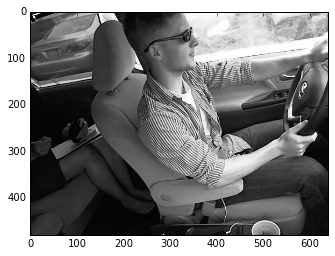

In [5]:
plt.imshow(sample_image, cmap='gray')

In [6]:
# pdb: python debugging 
#???????confuse about the calculaation 
import pdb
# an image  XX  with a kernel  hh  (typically a small matrix such as 3x3 or 5x5) 
def convolve(X, h):
    """
    Compute convolution of X with h.
    h is assumed to be a 3x3
    """
    I, J = X.shape
    Y = np.zeros_like(X)
    for i in range(1, I-1):
        for j in range(1, J-1):
            Y[i,j] = (X[i-1:i+2, j-1:j+2]*h).sum() #note that the boundaries are excluded
    return Y

## Kernel examples
### Edge detection (high pass filtering)

In [7]:
h = [[-1, -1, -1], 
    [-1, 8, -1],
    [-1, -1, -1]]
h = np.array(h)
h

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [8]:
Y = convolve(sample_image, h)

Clipping for display purposes

In [9]:
Y[Y>255] = 255
Y[Y<-255] = -255

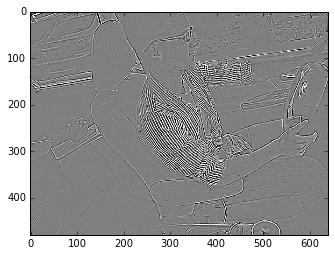

In [10]:
# what does cmap=gray mean 

plt.imshow(Y, cmap='gray')

### Blurring (low pass filtering)

In [11]:
h = np.ones((3,3))
h

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [12]:
Y = convolve(sample_image, h)

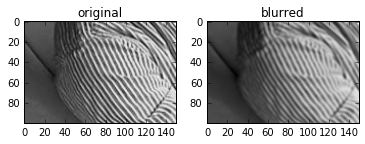

In [13]:
#plt.figure(figsize=(12,16))
#????? HOw to use subplot??
plt.subplot(1,2,1)
plt.imshow(sample_image[200:300, 200:350], cmap='gray')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(Y[200:300, 200:350], cmap='gray')
plt.title('blurred')